# Introduction to statistics for Geoscientists (with Python)
### Lecturer: Dr Alan R.T. Spencer | [alan.spencer@imperial.ac.uk](mailto:alan.spencer@imperial.ac.uk)
### Lecture 2: Bivariant statistics and scatter-plots
### URL: [https://github.com/alanspencer/IntroductionToStatsForGeoscientists](https://github.com/alanspencer/IntroductionToStatsForGeoscientists)

So far have looked at univariate statistics, i.e. one variable forming one distribution. **Bivariate statistics** look at two variables, e.g.:

* Total Organic Carbon (TOC) of rock sample AND fossil diversity.

The idea is to look for relationship between variables, e.g.:

* Is the fossil diversity lower when the TOC is higher?

If we can show there is a relationship, then we can start to look for possible causes. To study bivariate problems visually we use scatter plots.

## Scatter plot example: Does Dorset fieldwork marks predict overall year performance?

Here we are going to create a scatter plot of two variables (you will need to use the data file [/data/first_year_marks.csv](https://raw.githubusercontent.com/alanspencer/IntroductionToStatsForGeoscientists/master/data/first_year_marks.csv)).

In [1]:
%matplotlib inline

%cat ./data/first_year_marks.csv

Field Mark,Overall Year
50,56.5
75,71
70,75
60,66.8
65,55.5
75,68.5
55,58.8
60,80.5
65,82.5
75,71.8
75,55.5
65,71
65,66.5
65,74.3
50,55.3
65,58.3
70,66.5
45,70
70,63
55,75
55,71.8
40,58.5
65,68.5
70,72.3
80,68
70,72.3
70,64.5
70,54.3
65,75.3
55,61
80,76
75,66.8
50,62.8
65,73.5
65,75.8
65,68.5
60,69.3
65,59.5
60,57.3
65,64
65,67.5
65,71.8
70,75.8
65,57.3
70,69.5
80,69.3
55,74
75,61.3
55,65.3
60,71.5
70,89.8
65,61.5
65,67.5
60,76
55,75.3
60,63.8
80,72.5
55,73.3
70,72
60,63.3
75,74.8
60,66.3
70,59
60,74.5
65,80
65,69.8
85,62.5
80,66
70,67.5
75,82.8
70,71
75,77.5
65,64
60,73.3
50,62.5
85,75.3
70,67.8
70,73.8
70,61
65,70.8
70,69.8
30,53.8


In [3]:
import numpy as np

# Read in the records (remember from previous lecture - do not re-invent the wheel).
record = np.recfromcsv("./data/first_year_marks.csv")

print (record.dtype.names)

('field_mark', 'overall_year')


In [1]:
import matplotlib.pyplot as plt

# Now that we have the CSV headers, read records into numpy arrays.
fieldmarks = np.array(record["field_mark"],   dtype=float)
yearmarks  = np.array(record["overall_year"], dtype=float)

# 'bx' means blue 'x' markers
# zorder=3 to make sure this is in front of grid
plt.plot(fieldmarks, yearmarks, 'bx', markersize=5, markeredgewidth=2, zorder=3)
                            
# Not labeling a graph is unforgivable.  
plt.ylabel("Overall Year Mark",weight='bold')
plt.xlabel("Mark for Dorset",weight='bold')

# The rest is iceing
plt.xlim(0, 100)                 # both scales 0-100
plt.ylim(0, 100)

# The tick labels are quite long and take up a lof of space. To improve 
# the readability of our code we can store them as lists named: 
# xticktitles and yticktitles
xticktitles = ["0%", "3rd/Fail", "2ii/3rd", "2i/2ii", "2i/1st", "100%"]
yticktitles = ["3rd/Fail", "2ii/3rd", "2i/2ii", "2i/1st", "100%"]

# Ticks and labels to set up by category boundaries
plt.xticks([0, 40, 50, 60, 70, 100],xticktitles, rotation="vertical")
plt.yticks([40, 50, 60, 70, 100],   yticktitles)

# Turn on grid with thin dashed green lines
plt.grid(linestyle='--', linewidth=.5, color='green',zorder=1)

# Titles
plt.title("Fieldwork and Year marks 2010-11",weight='bold')

# Show the chart
plt.show()

NameError: name 'np' is not defined

This only shows relationship visually, so while it appears from the plot that there is no strong relationship, can we be more quantitative? Are these two variables actually independent?

# Linear regression

A common approach to bivariate data is to model it mathematically, for example by fitting a line to it (*linear regression*). This is not appropriate if there is only a weak relationship.

It is also possible to fix more complex curves but in this course we will restrict outselves to linear regression.

Many mathematical methods exist to find the best fitting line. By far most widely used is the *least squares method* which minimises the sum of squares of vertical errors. This can be computed in Python using the method [scipy.stats.linregress](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) which returns the slope, $m$, and intercept, $c$ parameters for the equation of the line:

$$y = mx + c.$$

# Exercise 2.1

1. Read in the file [/data/BrachiopodBiometrics.csv](https://raw.githubusercontent.com/alanspencer/IntroductionToStatsForGeoscientists/master/data/BrachiopodBiometrics.csv).
2. Create a scatter plot - label the plot approperiately.
3. Use linear regression to fit a line to the data.
4. Overlay the line on the scatter plot.

In [4]:
# Solution here

# Correlation
Plotting a scatter diagram gives a visual feel for how well two variables are related, or correlated. However, correlation can also be defined mathematically in terms of *r-values* - these have values in the range -1 to 1:

|r-value|Interpretation|
|:------|:--------------|
|-1     |Perfect negative correlation|
|-0.70  |Strong negative correlation|
|-0.50. |Moderate negative correlation|
|-0.30. |Weak negative correlation|
|0.     |No correlation|
|0.30.  |Weak correlation|
|0.50.  |Moderate correlation|
|0.70.  |Strong correlation|
|1.     |Perfect correlation|

There are commonly used methods for calculating correlation coefficients:

* Pearson product-moment correlation coefficient.
* Spearman’s rank correlation coefficient.

To explain them and the differences between them we need to cover a few more basic concepts, namely:

* Probability.
* Normal distributions.
* Parametric vs non-parametric statistics.

# Probability

The probability, $p$ of an event occurring is defined as a value in the range $(0, 1)$ where:

* $p=0$ implies the event will never occur.
* $p=1$ implies the event will always occur.

A classic example is dice-throwing. The probability of throwing a 6 in one die throw is $1/6$ $(=0.167)$. The probability of all possible outcomes will sum to 1.


# Probability and distributions

When we try to determine whether two variables are related/correlated we are immediately talking in terms of probability. It is possible that any apparent relationship is by chance. So we try to work out how unlikely this is as a *p-value*.

We use histograms of samples to get the underlying probability-distribution diagrams. We use probability-distribution curves by integrating the area under the curve to work out the probability of sampling from a range of values (can’t talk about probability of getting a particular value... why not?) The integral under the whole curve is 1 (why?)


# Normal distributions

Many real-world distributions approximate a ‘bell-shape’. This shape is known as a *Normal* or *Gaussian distribution*. It is very important in statistics and you are going to encounter it many times!

Normal distribution defined mathematically as:

$$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

where $\sigma$ is the standard deviation and $\mu$ is the mean. You don’t need to know the formula by rote but do need to know it only depends on *mean* and *standard deviation*.

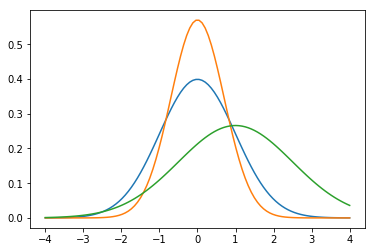

In [5]:
x = np.linspace(-4, 4, 100)
from scipy import stats
from numpy import sqrt, pi, exp
for mu, sigma in ((0, 1), (0, 0.7), (1, 1.5)):
    y = sqrt(1/(2*pi*sigma**2))*exp(-(x-mu)**2/(2*sigma**2))
    plt.plot(x, y)
plt.show()

Normal distributions are important as a lot of inferential statistical methods assume distributions are normal. However, no real-world distribution is completely normal. Often, people assume deviations from normal are minor - this can be problematic!

Consider the histogram of 2000 overall module marks from ESESIS (you will need to use the file [/data/2000marks.csv](https://raw.githubusercontent.com/alanspencer/IntroductionToStatsForGeoscientists/master/data/2000marks.csv).

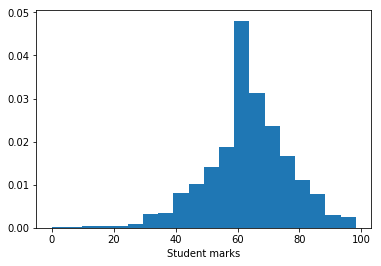

In [6]:
record = np.recfromtxt("./data/2000marks.csv")
marks = np.array(record, dtype=float)
plt.hist(marks, 20, normed=1)
plt.xlabel("Student marks")
plt.show()

Is this plot normally distributed? Sort of, but notice:

* Big peak around 60.
* Skewed – long left tail.

# Back to correlation

## Pearson product-moment correlation coefficient.
This is the most widely used method to get an r-value for correlation. We will not get into the mathematics involved here but you need to be aware of its main limitation - **assumes distributions being compared are normally distributed**.

To further complicate matters, it is unclear how much deviation is allowed...more about this later.

You can calculate a probability value for a Pearson r-value using [scipy.stats.pearsonr](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr).

Say we calculated an r-value of 0.3 for two particular samples, and we want to know whether this comes from true correlation, or might have happened by chance. For this we have the p-value. The p-value roughly indicates the probability of an *uncorrelated* system producing datasets that have r-value at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.


In [16]:
# Lets look at a trivial example - lets generate data where x==y.
d1 = np.linspace(-1, 1, 1000)
d2 = np.linspace(-1, 1, 1000)

r, p = stats.pearsonr(d1, d2)

print "r-value (correlation coefficient)", r
print "p-value (probability that we have got it wrong)", p

r-value (correlation coefficient) 1.0
p-value (probability that we have got it wrong) 0.0


## Non-parametric correlation

An alternative method for correlation is *Spearman’s rank correlation coefficient*. This is a non-parametric statistic - meaning that it does not rely on underlying data being of any particular distribution.

You can calculate Spearman’s rank correlation coefficient using [scipy.stats.spearmanr](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr)

In this case the p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. As is the case with the Pearson correlation corfficient, the p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

**Ideally use Pearson’s if data is normally distributed.**

In [15]:
# Again lets try this with our trivial dataset
r, p = stats.spearmanr(d1, d2)

print "r-value (correlation coefficient)", r
print "p-value (probability that we have got it wrong)", p

r-value (correlation coefficient) 1.0
p-value (probability that we have got it wrong) 0.0


# Exercise 2.2

For the [/data/first_year_marks.csv](https://raw.githubusercontent.com/alanspencer/IntroductionToStatsForGeoscientists/master/data/first_year_marks.csv) dataset:

* Calculate r and p values using both Pearson’s and Spearman’s correlation methodologies.
* Are these data correlated at all? If so is the correlation weak or strong?
* Plot histograms of each of the two variables, and overlay normal curves to the histograms. How well do they match?

In [9]:
# Solution here

## Exercise 2.3

For this practical you will need the Shock response data for sand. This can be found in the file [/data/sand_swdb.txt](https://github.com/alanspencer/IntroductionToStatsForGeoscientists/master/data/sand_swdb.txt), taken from the shock wave database.

## Exercise 2.3.1
* Open up the text file and have a look around, see what you're working with.
* Read in the file sand_swdb.txt into two arrays called pressure and energy.
    * Do NOT use recfromcsv to do this! numpy has other methods too, like genfromtxt, which recfromcsv is based on.
* Remember you do not want any 'commented' lines in the text file to be included, how would you do this?

## Exercise 2.3.2

* Make a scatter plot of pressure against energy.
* Label the axes appropriately (include units).
* Perform a linear regression on the data, and overlay the best fit line on the plot (as a dashed line).
* Add a legend to the plot and label the best fit line with its r-value. e.g. r = 0.5.
* Add (or change) the title of your plot to be y = {}x + {} and fill with the fit parameters.

## BONUS ROUND (Harder)

* Remake your plot, but this time with vertical errorbars of 10% on every point.

For this practical you should make extensive use of the matplotlib documentation.

In [10]:
# Solution here...